In [1]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
#to build function
#need to arrange by building id and meter
#need to set up chronological order in values

test = iris[['species','petal_width']].groupby(['species']).rolling(51,center=True,min_periods=1).sum()
test = test.rename(columns={'petal_width':'petal_width_rolling_sum'})

In [39]:
test = test.reset_index()
test

,species,level_1,petal_width_rolling_sum
0,setosa,0,6.4
1,setosa,1,6.8
2,setosa,2,7.0
3,setosa,3,7.2
4,setosa,4,7.4
...,...,...,...
145,virginica,145,60.4
146,virginica,146,58.1
147,virginica,147,56.1
148,virginica,148,54.1


In [40]:
iris['sum'] = test['petal_width_rolling_sum']
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sum
0,5.1,3.5,1.4,0.2,setosa,6.4
1,4.9,3.0,1.4,0.2,setosa,6.8
2,4.7,3.2,1.3,0.2,setosa,7.0
3,4.6,3.1,1.5,0.2,setosa,7.2
4,5.0,3.6,1.4,0.2,setosa,7.4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,60.4
146,6.3,2.5,5.0,1.9,virginica,58.1
147,6.5,3.0,5.2,2.0,virginica,56.1
148,6.2,3.4,5.4,2.3,virginica,54.1


In [41]:
iris.to_csv("rolling_average.csv", index = True)

In [60]:
trainData = pd.read_csv("../kaggle-data/train.csv")
trainData.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [61]:
rolling_average = pd.read_csv("../kaggle-data/train.csv")
rolling_average.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


The code below correctly calculates the rolling average
Do I need group by or could I just use multi index with building_id and meter? (not worthing finding out)

In [62]:
rolling_average['meter_reading_roll_avg'] = rolling_average['meter_reading']
rolling_average.set_index('timestamp',inplace=True)

rolling_average = rolling_average[['building_id','meter','meter_reading_roll_avg']].groupby(['building_id','meter']).rolling(101,center=True,min_periods=1).mean()
rolling_average

building_id  meter  \
building_id meter timestamp                                 
0           0     2016-01-01 00:00:00          0.0    0.0   
                  2016-01-01 01:00:00          0.0    0.0   
                  2016-01-01 02:00:00          0.0    0.0   
                  2016-01-01 03:00:00          0.0    0.0   
                  2016-01-01 04:00:00          0.0    0.0   
...                                            ...    ...   
1448        0     2016-12-31 19:00:00       1448.0    0.0   
                  2016-12-31 20:00:00       1448.0    0.0   
                  2016-12-31 21:00:00       1448.0    0.0   
                  2016-12-31 22:00:00       1448.0    0.0   
                  2016-12-31 23:00:00       1448.0    0.0   

                                       meter_reading_roll_avg  
building_id meter timestamp                                    
0           0     2016-01-01 00:00:00                0.000000  
                  2016-01-01 01:00:00                0.000000  
                  2016-01-01 02:00:00                0.000000  
                  2016-01-01 03:00:00                0.000000  
                  2016-01-01 04:00:00                0.000000  
...                                                       ...  
1448        0     2016-12-31 19:00:00                3.325909  
                  2016-12-31 20:00:00                3.314815  
                  2016-12-31 21:00:00                3.314151  
                  2016-12-31 22:00:00                3.319712  
                  2016-12-31 23:00:00                3.330392  

[20216100 rows x 3 columns]

In [63]:
trainData

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [64]:
rolling_average.drop(columns=['building_id','meter'], inplace=True)
rolling_average.tail(20)

meter_reading_roll_avg
building_id meter timestamp                                  
1448        0     2016-12-31 04:00:00                3.303571
                  2016-12-31 05:00:00                3.311957
                  2016-12-31 06:00:00                3.316176
                  2016-12-31 07:00:00                3.311567
                  2016-12-31 08:00:00                3.297727
                  2016-12-31 09:00:00                3.291154
                  2016-12-31 10:00:00                3.290625
                  2016-12-31 11:00:00                3.286111
                  2016-12-31 12:00:00                3.283871
                  2016-12-31 13:00:00                3.288934
                  2016-12-31 14:00:00                3.297083
                  2016-12-31 15:00:00                3.309322
                  2016-12-31 16:00:00                3.315948
                  2016-12-31 17:00:00                3.327632
                  2016-12-31 18:00:00                3.329464
                  2016-12-31 19:00:00                3.325909
                  2016-12-31 20:00:00                3.314815
                  2016-12-31 21:00:00                3.314151
                  2016-12-31 22:00:00                3.319712
                  2016-12-31 23:00:00                3.330392

In [65]:
trainData[(trainData['building_id']==1448) & (trainData['meter']==0)].tail(20).mean()

building_id      1448.000
meter               0.000
meter_reading       3.305
dtype: float64

Next step, merge meter_reading and meter_reading average

In [66]:
rolling_average.reset_index()

,building_id,meter,timestamp,meter_reading_roll_avg
0,0,0,2016-01-01 00:00:00,0.000000
1,0,0,2016-01-01 01:00:00,0.000000
2,0,0,2016-01-01 02:00:00,0.000000
3,0,0,2016-01-01 03:00:00,0.000000
4,0,0,2016-01-01 04:00:00,0.000000
...,...,...,...,...
20216095,1448,0,2016-12-31 19:00:00,3.325909
20216096,1448,0,2016-12-31 20:00:00,3.314815
20216097,1448,0,2016-12-31 21:00:00,3.314151
20216098,1448,0,2016-12-31 22:00:00,3.319712


In [67]:
trainData

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [68]:
trainData = pd.merge(trainData,rolling_average, on=['building_id','meter','timestamp'], how='inner')
trainData.tail(20)

,building_id,meter,timestamp,meter_reading,meter_reading_roll_avg
20216080,1434,0,2016-12-31 23:00:00,70.7250,74.272059
20216081,1434,2,2016-12-31 23:00:00,259.0730,245.896824
20216082,1435,0,2016-12-31 23:00:00,4.7250,4.999510
20216083,1436,0,2016-12-31 23:00:00,11.6000,13.247059
20216084,1436,2,2016-12-31 23:00:00,1274.6600,1849.094118
20216085,1437,0,2016-12-31 23:00:00,195.9250,464.884314
20216086,1437,2,2016-12-31 23:00:00,1518.9200,1692.489216
20216087,1438,0,2016-12-31 23:00:00,100.6750,107.773529
20216088,1438,2,2016-12-31 23:00:00,852.7700,1097.689686
20216089,1439,0,2016-12-31 23:00:00,167.4000,183.617647


In [69]:
trainData['outlier_ratio'] = trainData['meter_reading'] / trainData['meter_reading_roll_avg']
trainData

,building_id,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio
0,0,0,2016-01-01 00:00:00,0.000,0.000000,NaN
1,1,0,2016-01-01 00:00:00,0.000,0.690590,0.000000
2,2,0,2016-01-01 00:00:00,0.000,0.024090,0.000000
3,3,0,2016-01-01 00:00:00,0.000,0.000000,NaN
4,4,0,2016-01-01 00:00:00,0.000,0.000000,NaN
...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,7.472059,1.171029
20216096,1445,0,2016-12-31 23:00:00,4.825,5.565196,0.866996
20216097,1446,0,2016-12-31 23:00:00,0.000,0.782353,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.575,156.950000,1.016725


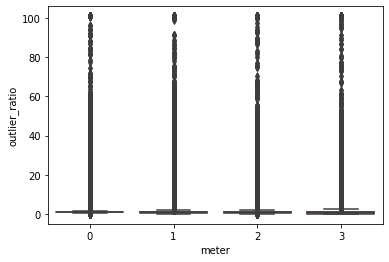

In [70]:
sns.boxplot(x='meter', y='outlier_ratio', data=trainData)

In [71]:
trainData.describe()

,building_id,meter,meter_reading,meter_reading_roll_avg,outlier_ratio
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,1.943586e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,2.116867e+03,9.738819e-01
std,4.269133e+02,9.309921e-01,1.532356e+05,1.441140e+05,9.168741e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,2.361525e+01,7.790039e-01
50%,8.950000e+02,0.000000e+00,7.877500e+01,8.697484e+01,9.709951e-01
75%,1.179000e+03,1.000000e+00,2.679840e+02,2.788812e+02,1.131774e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.808924e+07,1.010000e+02


In [72]:
trainData[trainData['outlier_ratio'] > 5].tail()

,building_id,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio
20203884,1271,1,2016-12-31 18:00:00,1.1225,0.200552,5.597058
20204059,1339,1,2016-12-31 18:00:00,29.1542,3.351671,8.698406
20205606,961,1,2016-12-31 19:00:00,482.1950,88.536980,5.446255
20212595,916,2,2016-12-31 22:00:00,36.6000,3.929808,9.313433
20214960,916,2,2016-12-31 23:00:00,36.6000,4.006863,9.134328


0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'

In [73]:
trainData.head()

,building_id,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio
0,0,0,2016-01-01 00:00:00,0.0,0.00000,NaN
1,1,0,2016-01-01 00:00:00,0.0,0.69059,0.0
2,2,0,2016-01-01 00:00:00,0.0,0.02409,0.0
3,3,0,2016-01-01 00:00:00,0.0,0.00000,NaN
4,4,0,2016-01-01 00:00:00,0.0,0.00000,NaN


In [92]:
x = trainData[(trainData['outlier_ratio'] < 3) | (trainData['outlier_ratio'].isnull())]

In [93]:
y=x[(x.meter == 2)]

y=y[(y.building_id == 776)]
y['timestamp'] = pd.to_datetime(y.timestamp)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8415 entries, 943 to 20214724
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   building_id             8415 non-null   int64         
 1   meter                   8415 non-null   int64         
 2   timestamp               8415 non-null   datetime64[ns]
 3   meter_reading           8415 non-null   float64       
 4   meter_reading_roll_avg  8415 non-null   float64       
 5   outlier_ratio           8376 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 460.2 KB


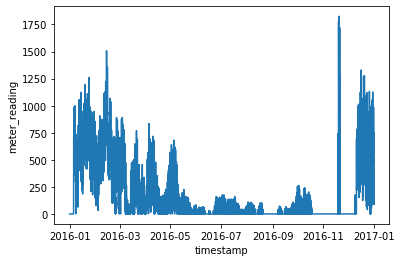

In [94]:
sns.lineplot(x="timestamp",y="meter_reading",data=y)

In [95]:
y=x[(x.meter == 2)]

y=y[(y.building_id == 762)]
y['timestamp'] = pd.to_datetime(y.timestamp)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8393 entries, 918 to 20214694
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   building_id             8393 non-null   int64         
 1   meter                   8393 non-null   int64         
 2   timestamp               8393 non-null   datetime64[ns]
 3   meter_reading           8393 non-null   float64       
 4   meter_reading_roll_avg  8393 non-null   float64       
 5   outlier_ratio           8358 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 459.0 KB


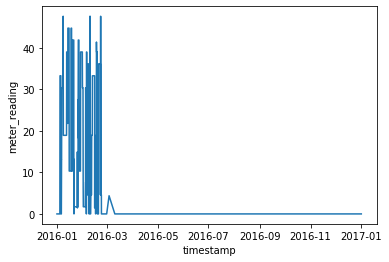

In [96]:
sns.lineplot(x="timestamp",y="meter_reading",data=y)